In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from collections import Counter
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import itertools

## 1. Загружаем данные, смотрим на то, какие есть признаки

In [2]:
data = pd.read_csv('/Users/Valeriya/Desktop/zadanie_2017_datascience_main/pokemon.csv')

In [3]:
data.columns.values 

array(['id', 'identifier', 'name', 'name_phonetic', 'species', 'name_jp',
       'name_jp_romaji', 'species_jp', 'generation_id', 'ndex', 'kdex',
       'jdex', 'jdex_old', 'hdex', 'sdex', 'udex', 'type1_id', 'type2_id',
       'ability1_id', 'ability2_id', 'abilitydream_id',
       'evolution_parent_pokemon_id', 'evolution_method_id',
       'evolution_parameter', 'height', 'weight', 'gender_rate',
       'catch_rate', 'exp_yield', 'base_happiness', 'egg_group1_id',
       'egg_group2_id', 'is_baby', 'baby_breed_item_id', 'hatch_counter',
       'lvl_100_exp', 'pokemon_order', 'legacy_id'], dtype=object)

## Гипотеза: 
### можно предсказать параметр hatch_counter (то, сколько "шагов" требуется, чтоб вылупить яйцо) по признакам, связанным с детьми-покемонами и с видами покемонов:
### • 'gender_rate'
### • 'type2_id'
### • 'egg_group2_id'
### • 'is_baby'
### • 'catch_rate'
### • 'lvl_100_exp'
### • 'exp_yield'
### • 'type1_id'
### • 'egg_group1_id'
### • 'baby_breed_item_id'

Сайт http://bulbapedia.bulbagarden.net/  чуть-чуть помог мне разобраться со значениями признаков

### Целевая переменная - hatch_counter. Пришлось исключить hatch_counter == 5, так как там всего два покемона в выборке. Также пришлось кое-где заполнить Nan-ы (для простоты - нулями)

In [336]:
data_clas = data[data.hatch_counter != 5]

In [337]:
data_clas = data_clas.fillna(0)

In [475]:
le = preprocessing.LabelEncoder() # кодирование названий видов числами - правда, далее я их  при классификации не использовала
le.fit(data_clas['species'])
# le.transform(data_clas['species'])

LabelEncoder()

In [339]:
data_clas['species'] = le.transform(data_clas['species'])

In [452]:
X = data_clas[['gender_rate','type2_id','egg_group2_id', 'is_baby','catch_rate' ,'lvl_100_exp','exp_yield','type1_id', 'egg_group1_id', 'baby_breed_item_id']]

In [453]:
y = data_clas['hatch_counter']

In [476]:
Counter(y) # посмотреть на размер классов

Counter({10: 21,
         15: 100,
         20: 370,
         25: 49,
         30: 22,
         35: 12,
         40: 36,
         80: 16,
         120: 35})

## Деление на train/test

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Для классификации выбран Random Forest

In [455]:
clf = RandomForestClassifier(n_estimators = 210)

In [456]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=210, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [457]:
y_pred = clf.predict(X_test)

## Classification Report

In [458]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         10       1.00      0.75      0.86         4
         15       0.78      0.58      0.67        31
         20       0.82      0.94      0.87       129
         25       0.73      0.42      0.53        19
         30       0.44      1.00      0.62         4
         35       1.00      0.33      0.50         6
         40       1.00      0.64      0.78        11
         80       0.80      1.00      0.89         4
        120       0.91      0.91      0.91        11

avg / total       0.82      0.81      0.80       219



In [460]:
print(confusion_matrix(y_test, y_pred))

[[  3   0   1   0   0   0   0   0   0]
 [  0  18  10   0   3   0   0   0   0]
 [  0   5 121   2   0   0   0   0   1]
 [  0   0   9   8   2   0   0   0   0]
 [  0   0   0   0   4   0   0   0   0]
 [  0   0   4   0   0   2   0   0   0]
 [  0   0   3   1   0   0   7   0   0]
 [  0   0   0   0   0   0   0   4   0]
 [  0   0   0   0   0   0   0   1  10]]


In [477]:
# data[data.hatch_counter == 10]

In [478]:
# clf.feature_importances_

### Качество для 9 классов - 0.82 (accuracy), 0.81 (recall), 0.80 (f1-score)

# Визуализация confusion matrix

Confusion matrix, without normalization
[[  3   0   1   0   0   0   0   0   0]
 [  0  18  10   0   3   0   0   0   0]
 [  0   5 121   2   0   0   0   0   1]
 [  0   0   9   8   2   0   0   0   0]
 [  0   0   0   0   4   0   0   0   0]
 [  0   0   4   0   0   2   0   0   0]
 [  0   0   3   1   0   0   7   0   0]
 [  0   0   0   0   0   0   0   4   0]
 [  0   0   0   0   0   0   0   1  10]]
Normalized confusion matrix
[[ 0.75  0.    0.25  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.58  0.32  0.    0.1   0.    0.    0.    0.  ]
 [ 0.    0.04  0.94  0.02  0.    0.    0.    0.    0.01]
 [ 0.    0.    0.47  0.42  0.11  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.67  0.    0.    0.33  0.    0.    0.  ]
 [ 0.    0.    0.27  0.09  0.    0.    0.64  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.09  0.91]]


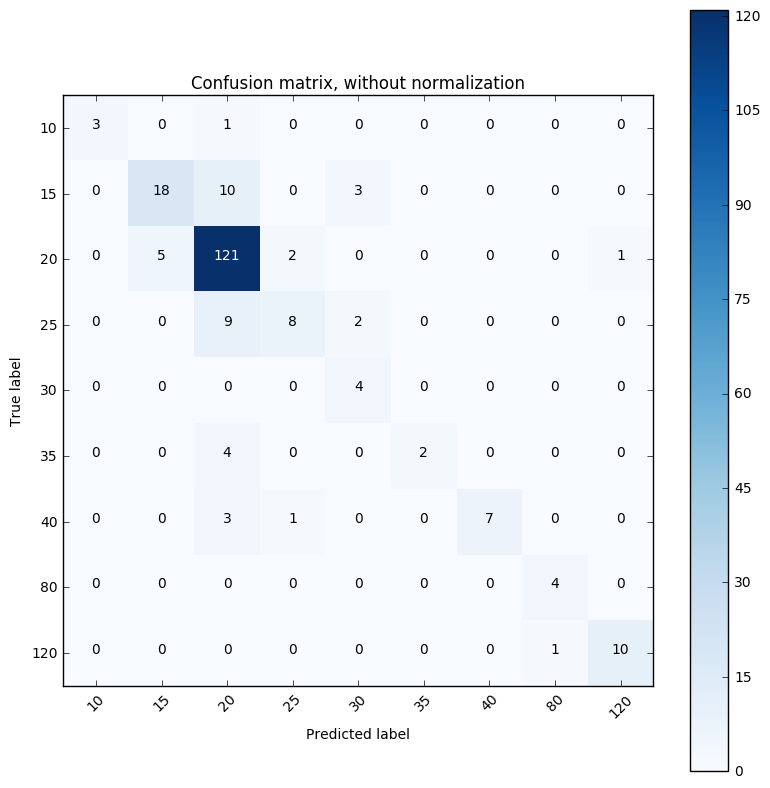

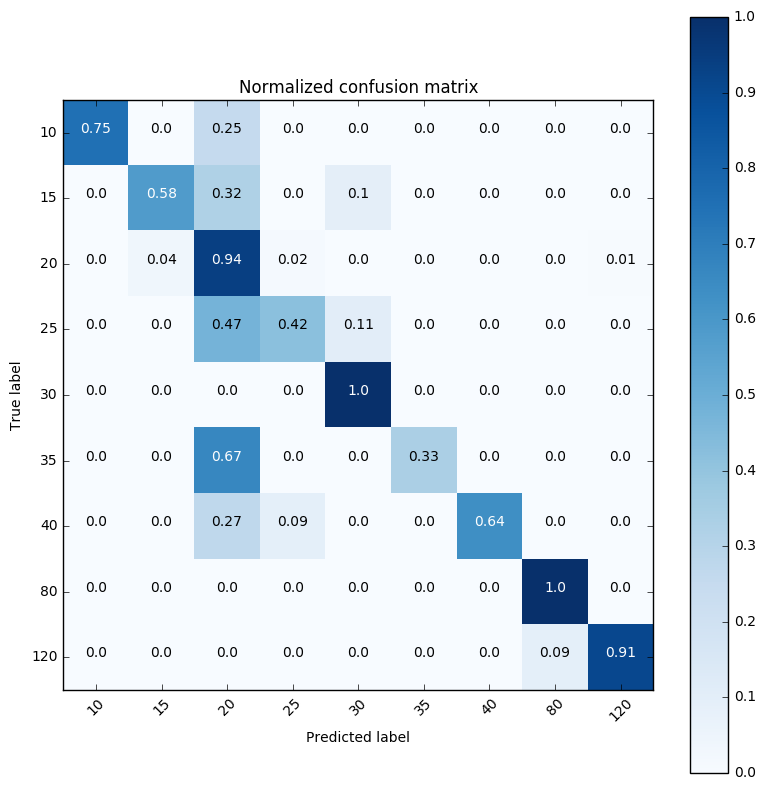

In [482]:
# источник - 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        val = round(cm[i, j], 2)
        plt.text(j, i, val,
                 horizontalalignment="center",
                 color="white" if val > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = sorted(set(y_test))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()